In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import exp, log
import pandas as pd
import matplotlib as mpl
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable
from floquet_simulations.plot_functions import PlotParams
from matplotlib.colors import LinearSegmentedColormap
from floquet_simulations.hamiltonians import ConvertComplex
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.special import jn_zeros

PlotParams(fontsize=10)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T


def FloatToStringSave(a):
    return str(a).replace(".", "p")
fontsize = 10
PlotParams(fontsize=fontsize)

def unique(a):
    unique, counts = np.unique(a, return_counts=True)
    return np.asarray((unique, counts)).T

def FloatToStringSave(a):
    return str(a).replace(".", "p")

cmap = LinearSegmentedColormap.from_list('custom hamiltonians', ['#006F63', '#F78320'], N=256)
figsize=(5,4)
cm_unit = 1/2.54
def _inverse(x):
    return x**(1. / 10)


def _forward(x):
    return x**10

norm_powerlaw = mpl.colors.FuncNorm((_forward, _inverse), vmin=0, vmax=18.5)

fontsize_mult = 1.4
colourbar_bbox_anchor = (0.04, -0.43, 0.7, 1.38)
save_fig_dir = Path().absolute().parent.parent/"figures"/"thesis"/"floquet"

In [2]:
# dfO = pd.read_csv("D:Data/Set21-alpha=1,beta=2,omega=8,local/"+"data_3.csv",
#                            index_col=False)
# df_dir = Path().absolute().parent.parent/"paper_data"/"data_3.csv"
# df_dir = Path().absolute().parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0.csv"
df_dir = Path().absolute().parent.parent/"paper_data"/"Heff_omega=8,alpha=1,beta=2,phi3=0,newvals.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex})
# dfO = pd.read_csv("D:/Data/Merges/alpha=1,beta=2,omega=8,0-40/FT/FT-Min,phi3=0.csv",
#                   index_col=False)
# dfP0 = pd.read_csv("D:/Data/Set12-alpha=1,beta=2,omega=8/Summaries/FT-ABS-phi3=0.csv", 
#                     index_col = False)
dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = 18.5
A2_range = int((A2_max - A2_min)*100 +1)
A3_min = 37
A3_max = 38.5
A3_range = int((A3_max - A3_min)*100 +1)
# domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]

dfP = dfP.sort_values(by=['A3', 'A2'], ignore_index=True)

#%%
"""plot raw hopping"""
J12 = np.abs(np.array(dfP["FT-J12"].to_list()))
J23 = np.abs(np.array(dfP["FT-J23"].to_list()))
J31 = np.abs(np.array(dfP["FT-J31"].to_list()))
X_flat = J23 / J12
Y_flat = J31 / J12
A2_flat = np.array(dfP.A2.to_list())
A3_flat = np.array(dfP.A3.to_list())

# remove off diagonal parts
X_flat = np.where(X_flat>Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)

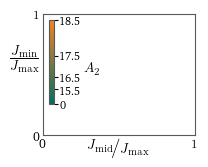

In [3]:
y_axis_coords = (-0.12, 0.53)
x_axis_coords = (0.5, -0.02)


colour_flat = A2_flat

colour_flat = np.where(colour_flat ==0, colour_flat+1e-9, colour_flat )
minn, maxx = colour_flat.min(), colour_flat.max()
# norm = mpl.colors.Normalize(minn, maxx)
# norm = mpl.colors.LogNorm(vmin=minn+1e-9, vmax=maxx)

# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
# ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.2, alpha=1, norm=norm_powerlaw, cmap=cmap)


ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=False, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))


ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$',  rotation=0, fontsize=fontsize*fontsize_mult)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', rotation = 0, fontsize=fontsize*fontsize_mult)

ax.yaxis.set_label_coords(y_axis_coords[0], y_axis_coords[1])
ax.xaxis.set_label_coords(x_axis_coords[0], x_axis_coords[1])

# colourbar_pad = 0.1; colourbar_size_percentage=7
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)
# # ticks = np.concatenate((np.array([0]), exp(log(np.linspace(1/3, 1, 3))/10)*18.5), axis=None)
ticks = np.array([0, 15.5, 16.5, 17.5, 18.5])
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_powerlaw, cmap=cmap), cax=cax, ticks=ticks)
# cbar.ax.set_yticklabels([f"${ti:.1f}$" for ti in ticks])
# cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=8)


axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=colourbar_bbox_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_powerlaw, cmap=cmap), cax=axins, ticks=ticks, ticklocation="right")
cbar.ax.tick_params(labelsize=8, pad=1)
cbar.ax.set_yticklabels([0,15.5,16.5,17.5,18.5])
cbar.set_label("$A_2$", loc="center", rotation=0, labelpad=8)


fig.savefig(save_fig_dir/"triangle_parameters_beta=2_A2_unfilled.pdf", transparent=True, format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()


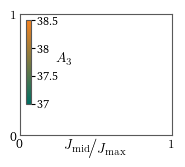

In [4]:

colour_flat = A3_flat
minn, maxx = colour_flat.min(), colour_flat.max()
norm_flat = mpl.colors.Normalize(minn, maxx)

# plot
fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
# ax.scatter(X_flat, Y_flat, c=colour_flat, s = 0.3, alpha=1, norm=norm_flat, cmap=cmap)


ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=False, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$', rotation=0, fontsize=fontsize*fontsize_mult)
# ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', rotation = 0, fontsize=fontsize*1.3)

ax.yaxis.set_label_coords(y_axis_coords[0], y_axis_coords[1])
ax.xaxis.set_label_coords(x_axis_coords[0], x_axis_coords[1])

ticks = [37, 37.5, 38, 38.5]

# colourbar_pad = 0.1; colourbar_size_percentage=7
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)
# # ticks = np.concatenate((np.array([0]), exp(log(np.linspace(1/3, 1, 3))/10)*18.5), axis=None)
# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_flat, cmap=cmap), cax=cax, ticks=ticks)
# cbar.ax.set_yticklabels([f"${ti:.1f}$" for ti in ticks])
# cbar.ax.set_ylabel(r"$A_3$", rotation=0, labelpad=8)

axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=colourbar_bbox_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_flat, cmap=cmap), cax=axins, ticks=ticks, ticklocation="right")
cbar.ax.tick_params(labelsize=8, pad=1)
cbar.ax.set_yticklabels([37,37.5,38,38.5])
cbar.set_label("$A_3$", loc="center", rotation=0,verticalalignment='baseline')


fig.savefig(save_fig_dir/"triangle_parameters_beta=2_A3_unfilled.pdf", format="pdf", bbox_inches="tight", pad_inches=0)

plt.show()

### alpha = beta

In [5]:
df_dir = Path().absolute().parent.parent/"paper_data"/f"Heff_omega=8,alpha=1,beta=1,phi3=0,2.csv"
dfO = pd.read_csv(df_dir, index_col=False, 
                        converters={"FT-J12": ConvertComplex,
                                  "FT-J23": ConvertComplex,
                                  "FT-J31": ConvertComplex,
                                    })


dfO["FT-J12oJ23"] = np.abs(dfO["FT-J12"] / dfO["FT-J23"])
dfO["FT-J31oJ23"] = np.abs(dfO["FT-J31"] / dfO["FT-J23"])

# dfO = dfO.sort_values(by=['A3', 'A2'], ignore_index=True)

A2_min = 0
A2_max = jn_zeros(0,1)[0]*8
A2_range = len(np.append(np.linspace(0,19.2,193), [1]))
A3_min = 0
A3_max = jn_zeros(0,1)[0]*8
A3_range = len(np.append(np.linspace(0,19.2,193), [1]))
# # domains
dfP = dfO[
           (dfO.A3 <=A3_max)
           &(dfO.A3 >= A3_min)
           &(dfO.A2 <=A2_max)
           &(dfO.A2 >=A2_min)
          ]


X_flat = np.array(dfP["FT-J12oJ23"].to_list())
Y_flat = np.array(dfP["FT-J31oJ23"].to_list())

# remove off diagonal parts
X_flat = np.where(X_flat>Y_flat, X_flat, np.nan)
Y_flat = np.where(X_flat>Y_flat, Y_flat, np.nan)

#remove parts outside the triangl
X_flat = np.where(X_flat<=1, X_flat, np.nan)
Y_flat =np.where(X_flat<=1, Y_flat, np.nan)


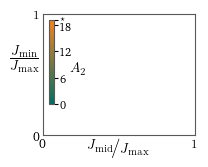

In [6]:

#set colour axis
colour_flat = np.array(dfP.A2.to_list())
# colour_flat = np.array(dfP.A3.to_list())

minn, maxx = colour_flat.min(), colour_flat.max()
norm_flat = mpl.colors.Normalize(minn, maxx)

fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
# ax.scatter(X_flat, Y_flat, c=colour_flat, s = 1, alpha=1, norm=norm_flat, cmap=cmap)

ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=False, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])
ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$',  rotation=0, fontsize=fontsize*fontsize_mult)
ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', rotation = 0, fontsize=fontsize*fontsize_mult)

ax.yaxis.set_label_coords(y_axis_coords[0], y_axis_coords[1])
ax.xaxis.set_label_coords(x_axis_coords[0], x_axis_coords[1])

# colourbar_pad = 0.1; colourbar_size_percentage=7
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = [0, 6, 12, 18, 19.2])
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
# cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=8)

ticks = [0, 6, 12, 18, 19.2]
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=colourbar_bbox_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_flat, cmap=cmap), cax=axins, ticks=ticks, ticklocation="right")
cbar.ax.tick_params(labelsize=8, pad=1)
cbar.ax.set_yticklabels([0,6,12,18,"$^{\star}$"])
cbar.set_label("$A_2$", loc="center", rotation=0)

fig.savefig(save_fig_dir/"triangle_parameters_beta=1_A2_unfilled.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()

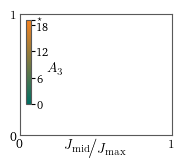

In [7]:

#set colour axis
# colour_flat = np.array(dfP.A2.to_list())
colour_flat = np.array(dfP.A3.to_list())

minn, maxx = colour_flat.min(), colour_flat.max()
norm_flat = mpl.colors.Normalize(minn, maxx)

fig, ax = plt.subplots(figsize=(figsize[0]*cm_unit, figsize[1]*cm_unit))
# ax.scatter(X_flat, Y_flat, c=colour_flat, s = 1, alpha=1, norm=norm_flat, cmap=cmap)

ax.tick_params(axis="x", bottom=False, top=False, labelbottom=True, 
        labeltop=False, direction = "in", length = 3, pad=2)  
ax.tick_params(axis="y", left=False, right=False, labelleft=True, 
        labelright=False, direction = "in", length = 3, pad=2)  


ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])

ax.set_xlim((0,1))
ax.set_ylim((0,1))



ax.set_xticks([0,1], labels=["0", r"$1$"])
ax.set_yticks([0,1], labels=["0", r"$1$"])
ax.set_xlabel(r'$\nicefrac{J_{\mathrm{mid}}}{J_{\mathrm{max}}}$',  rotation=0, fontsize=fontsize*fontsize_mult)
# ax.set_ylabel(r'$\frac{J_{\mathrm{min}}}{J_{\mathrm{max}}}$', rotation = 0, fontsize=fontsize*fontsize_mult)

ax.yaxis.set_label_coords(y_axis_coords[0], y_axis_coords[1])
ax.xaxis.set_label_coords(x_axis_coords[0], x_axis_coords[1])

# colourbar_pad = 0.1; colourbar_size_percentage=7
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size=f"{colourbar_size_percentage}%", pad=colourbar_pad)

# cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, ticks = [0, 6, 12, 18, 19.2])
# cbar.ax.set_yticklabels([r"$0$", r"$6$", r"$12$", r"$18$", r"$\ast$"])
# cbar.ax.set_ylabel(r"$A_2$", rotation=0, labelpad=8)


ticks = [0, 6, 12, 18, 19.2]
axins = inset_axes(
    ax,
    width="5%",  # width: 5% of parent_bbox width
    height="50%",  # height: 50%
    loc="upper left",
    bbox_to_anchor=colourbar_bbox_anchor,
    bbox_transform=ax.transAxes,
    borderpad=0,
)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm_flat, cmap=cmap), cax=axins, ticks=ticks, ticklocation="right")
cbar.ax.tick_params(labelsize=8, pad=1)
cbar.ax.set_yticklabels([0,6,12,18,"$^{\star}$"])
cbar.set_label("$A_3$", loc="center", rotation=0)

fig.savefig(save_fig_dir/"triangle_parameters_beta=1_A3_unfilled.pdf", format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()